>In this third phase of the project, we :  

>> build another predictor from the available data   
>> suggest to pre-scale the target variable 

>with the aim to improve the model performance

### Table of Contents

* [1. Load Data](#section1)
* [2. Feature Engineering](#section2)
* [3. Linear Regressor (Model 2)](#section3)
* [4. Summary](#section3)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Generic librairies 
import pandas as pd
pd.options.display.max_columns=None

import numpy as np

# Visualization librairies 
import seaborn as sns

# Machine learning librairies
# split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Regressors
from sklearn.linear_model import LinearRegression

# score metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# predefined modules
from modules import MyFunctions as MyFunct

# Global parameters 
filepath = 'data/prep_walmart_sales.csv'
metrics_path = 'data/metrics.csv'

 # Load data

In [2]:
print("Loading dataset...")
dataset = pd.read_csv(filepath)
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
MyFunct.explore(dataset)

Shape : (6297, 8)

data types : 
Store           float64
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Week            float64
dtype: object

Display of dataset: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1.0,1643690.90,0.0,42.31,2.572,211.096358,8.106,5.0
1,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,6.0
2,1.0,1611968.17,0.0,39.93,2.514,211.289143,8.106,7.0
3,1.0,1409727.59,0.0,46.63,2.561,211.319643,8.106,8.0
4,1.0,1554806.68,0.0,46.50,2.625,211.350143,8.106,9.0



Basics statistics: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
count,6297.000000,6.297000e+03,6286.000000,6283.000000,6285.000000,6286.000000,6283.000000,6279.000000
mean,22.722566,1.055463e+06,0.069997,60.433589,3.359432,173.251996,7.780878,25.900621
std,13.069591,5.693211e+05,0.255162,18.487402,0.461103,39.150100,1.512723,14.125355
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000
25%,11.000000,5.570752e+05,0.000000,46.970000,2.915000,132.586532,6.881000,14.000000
50%,22.000000,9.619933e+05,0.000000,62.590000,3.467000,188.274383,7.852000,26.000000
75%,34.000000,1.438383e+06,0.000000,74.830000,3.735000,213.206962,8.521000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,13.503000,52.000000



Distinct values: 


Store             45
Weekly_Sales    6216
Holiday_Flag       3
Temperature     3495
Fuel_Price       881
CPI             2158
Unemployment     358
Week              53
dtype: int64

# Feature Engineering

In [4]:
flow_store = dataset.groupby(['Store']).agg({'Week':'count'})
flow_store_df=pd.DataFrame(columns=['Store', 'flow'])
flow_store_df['Store'] = flow_store.Week.index
flow_store_df['flow'] = flow_store.Week.tolist()

In [5]:
dataset = pd.merge(dataset, flow_store_df, on='Store')
dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,flow
0,1.0,1643690.90,0.0,42.31,2.572,211.096358,8.106,5.0,149
1,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,6.0,149
2,1.0,1611968.17,0.0,39.93,2.514,211.289143,8.106,7.0,149
3,1.0,1409727.59,0.0,46.63,2.561,211.319643,8.106,8.0,149
4,1.0,1554806.68,0.0,46.50,2.625,211.350143,8.106,9.0,149
...,...,...,...,...,...,...,...,...,...
6292,45.0,713173.95,0.0,64.88,3.997,192.013558,8.684,39.0,143
6293,45.0,733455.07,0.0,64.89,3.985,192.170412,8.667,40.0,143
6294,45.0,734464.36,0.0,54.47,4.000,192.327265,8.667,41.0,143
6295,45.0,718125.53,0.0,56.47,3.969,192.330854,8.667,42.0,143


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

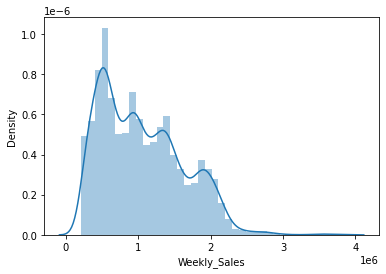

In [6]:
sns.distplot(dataset['Weekly_Sales'])

In [7]:
# change the scale using the log function so the distribution becomes evenly distributed.
dataset['Weekly_Sales'] = np.log10(dataset['Weekly_Sales'] )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

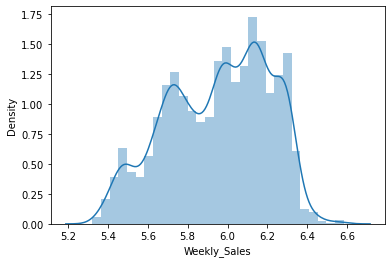

In [8]:
sns.distplot(dataset['Weekly_Sales'])

# Linear Regressor (Model 2)

In [9]:
# Define target variable (y) and explanatory variables (X)
Y = dataset['Weekly_Sales']
X = dataset.drop('Weekly_Sales', axis = 'columns')

# Divide dataset (131 observations) Train (0.8 ~ 104) set & Test set (0.2 ~ 27)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

# Create pipeline for numeric features 
#Num_X =['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'flow'] 
num_X = [2,3,4,5,6,7]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
#cat_X = ['Store', 'Holiday_Flag']
cat_X = [0,1]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTranformer to make a preprocessor object 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_X),
        ('cat', categorical_transformer, cat_X)
    ])

# Preprocessings on train set (24 cols = 5 for numerci columns + 1 for holiday_flag + 18 for store, store 12 is deleted with the outliers)
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

In [10]:
iterables = [["RMSE", "R2", "ADJ R2"], ["Train", "Test"]]
ind = pd.MultiIndex.from_product(iterables)
metrics = pd.read_csv(metrics_path)
metrics.index=ind
metrics

Dummy Regressor  Linear Regressor  Ridge Regressor  \
RMSE   Train    567328.360407     152726.329640    153158.994076   
       Test     576996.112490     156892.312457    157579.399292   
R2     Train         0.000000          0.927530         0.927119   
       Test         -0.000009          0.926063         0.925414   
ADJ R2 Train        -0.010028          0.926803         0.926388   
       Test         -0.010037          0.925322         0.924666   

              Lasso Regressor  
RMSE   Train    152731.581165  
       Test     156919.292010  
R2     Train         0.927525  
       Test          0.926038  
ADJ R2 Train         0.926798  
       Test          0.925296

In [11]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

y_train_pred, y_test_pred= linear_regressor.predict(X_train), linear_regressor.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

#compute SS for F_value Computation
SST2, SSR2, SSE2 = MyFunct.sum_squares(Y_train, y_train_pred)

metrics['Linear Regressor 2'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test, adjR2_train, adjR2_test]
metrics

Dummy Regressor  Linear Regressor  Ridge Regressor  \
RMSE   Train    567328.360407     152726.329640    153158.994076   
       Test     576996.112490     156892.312457    157579.399292   
R2     Train         0.000000          0.927530         0.927119   
       Test         -0.000009          0.926063         0.925414   
ADJ R2 Train        -0.010028          0.926803         0.926388   
       Test         -0.010037          0.925322         0.924666   

              Lasso Regressor  Linear Regressor 2  
RMSE   Train    152731.581165            0.050567  
       Test     156919.292010            0.049128  
R2     Train         0.927525            0.960796  
       Test          0.926038            0.963426  
ADJ R2 Train         0.926798            0.960395  
       Test          0.925296            0.963052

# Summary
>As we can see, the second linear model performs better than the first linear model.  